# **PROJECT 3 - Data Visualization with Python**

BY: Rania Virda Sukmaningsih

1.   **Case 1**


> Terdapat empat table dari database
perusahaan. Tujuan anda adalah
menggabungkan semua tabel dan
mendapatkan beberapa field antara lain:
- orders_data, customer_data, order_items_data, product_data


> **Gunakan SQL Command**


2.   **Case 2**

> Lakukan visualisasi antara lain:
- Trend total penjualan (order_id) berdasarkan order_purchase_timestamp
- Total price per customer_state menggunakan bar chart
- Tampilkan total penjualan (order_id) berdasarkan order status menggunakan pie
chart.
- Trend penjualan (order_id) per bulan di tahun 2018 di tiap order status
menggunakan stack bar chart.



> **Download data hasil SQL Command & Visualisasikan di Python**







## **Case 1**

SQL Command:

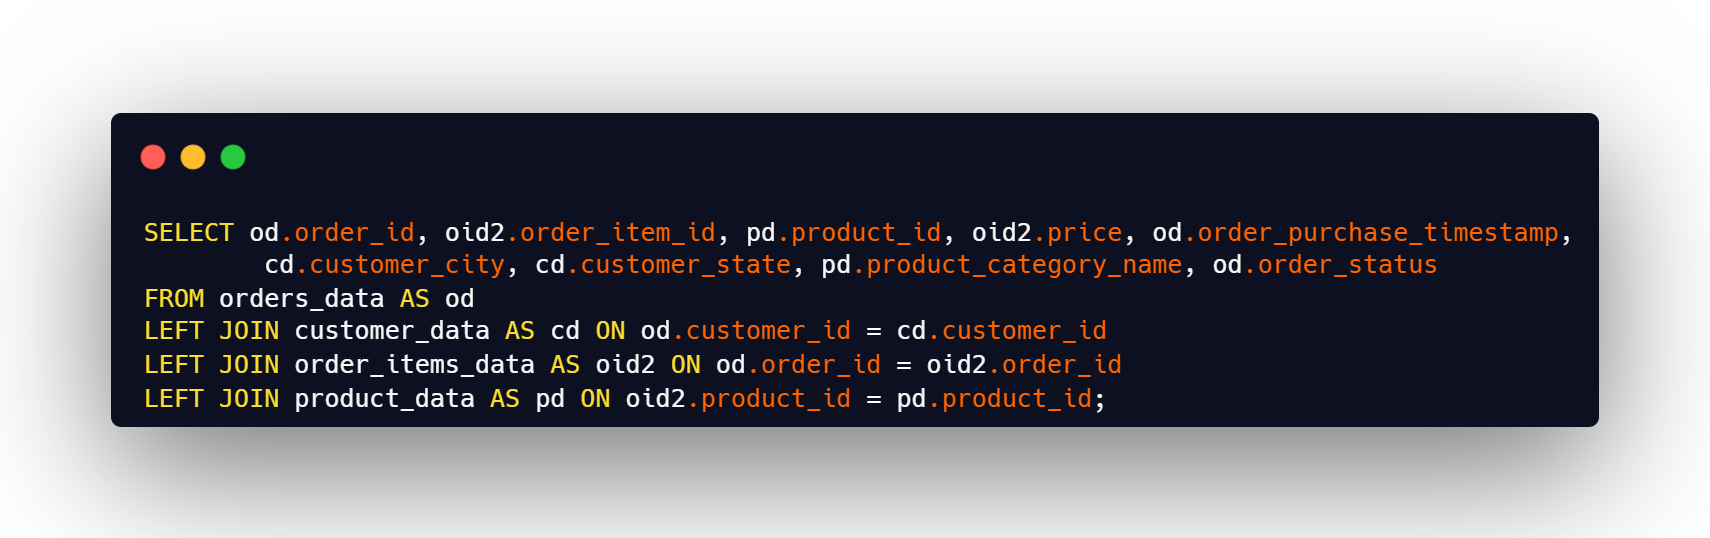

## **Case 2**

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Digital Skola - Data Analytics/Project3-202311252111.csv')
df.head()

,order_id,order_item_id,product_id,price,order_purchase_timestamp,customer_city,customer_state,product_category_name,order_status
0,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,239.90,2017-04-26 10:53:06,santa fe do sul,SP,pet_shop,delivered
1,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,199.00,2018-01-14 14:33:31,para de minas,MG,moveis_decoracao,delivered
2,00048cc3ae777c65dbb7d2a0634bc1ea,1.0,ef92defde845ab8450f9d70c526ef70f,21.90,2017-05-15 21:42:34,uberaba,MG,utilidades_domesticas,delivered
3,0005a1a1728c9d785b8e2b08b904576c,1.0,310ae3c140ff94b03219ad0adc3c778f,145.95,2018-03-19 18:40:33,santos,SP,beleza_saude,delivered
4,00061f2a7bc09da83e415a52dc8a4af1,1.0,d63c1011f49d98b976c352955b1c4bea,59.99,2018-03-24 22:16:10,piracicaba,SP,beleza_saude,delivered


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_id                  113425 non-null  object 
 1   order_item_id             112650 non-null  float64
 2   product_id                112650 non-null  object 
 3   price                     112650 non-null  float64
 4   order_purchase_timestamp  113425 non-null  object 
 5   customer_city             113425 non-null  object 
 6   customer_state            113425 non-null  object 
 7   product_category_name     111047 non-null  object 
 8   order_status              113425 non-null  object 
dtypes: float64(2), object(7)
memory usage: 7.8+ MB


Change order_purchase_timestamp to date time type

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  113425 non-null  object        
 1   order_item_id             112650 non-null  float64       
 2   product_id                112650 non-null  object        
 3   price                     112650 non-null  float64       
 4   order_purchase_timestamp  113425 non-null  datetime64[ns]
 5   customer_city             113425 non-null  object        
 6   customer_state            113425 non-null  object        
 7   product_category_name     111047 non-null  object        
 8   order_status              113425 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 7.8+ MB


In [ ]:
df.head()

,order_id,order_item_id,product_id,price,order_purchase_timestamp,customer_city,customer_state,product_category_name,order_status
0,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,239.90,2017-04-26 10:53:06,santa fe do sul,SP,pet_shop,delivered
1,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,199.00,2018-01-14 14:33:31,para de minas,MG,moveis_decoracao,delivered
2,00048cc3ae777c65dbb7d2a0634bc1ea,1.0,ef92defde845ab8450f9d70c526ef70f,21.90,2017-05-15 21:42:34,uberaba,MG,utilidades_domesticas,delivered
3,0005a1a1728c9d785b8e2b08b904576c,1.0,310ae3c140ff94b03219ad0adc3c778f,145.95,2018-03-19 18:40:33,santos,SP,beleza_saude,delivered
4,00061f2a7bc09da83e415a52dc8a4af1,1.0,d63c1011f49d98b976c352955b1c4bea,59.99,2018-03-24 22:16:10,piracicaba,SP,beleza_saude,delivered


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.0,1.00,1.0,21.0
price,112650.0,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0


In [ ]:
df.customer_city.value_counts()

sao paulo            17946
rio de janeiro        7885
belo horizonte        3167
brasilia              2407
curitiba              1762
                     ...  
ravena                   1
pinto bandeira           1
vila nova do sul         1
jaguarembe               1
palmital de minas        1
Name: customer_city, Length: 4119, dtype: int64

### 1. **Trend total penjualan (order_id) berdasarkan order_purchase_timestamp**

**TRACKING JANUARI SAMPAI AGUSTUS 2018**

In [ ]:
# Kelompokkan berdasarkan tanggal dan hitung jumlah pesanan setiap harinya
daily_orders = df.groupby(df['order_purchase_timestamp'].dt.date)['order_id'].count()

# Tampilkan hasil
#daily_orders

**Mencari penjualan rata2**

In [ ]:
rata_rata_daily_orders = daily_orders.mean()
print(f'Penjualan rata-rata adalah {rata_rata_daily_orders:.0f} per hari')

Penjualan rata-rata adalah 179 per hari


**Penjualan tertinggi dan terendah**

In [ ]:
# Mengidentifikasi penjualan tertinggi
tanggal_penjualan_tertinggi = daily_orders.idxmax()
total_penjualan_tertinggi = daily_orders.max()

#Mengidentifikasi penjualan terendah
tanggal_penjualan_terendah = daily_orders.idxmin()
total_penjualan_terendah = daily_orders.min()

print(f"Total penjualan tertinggi terjadi pada tanggal {tanggal_penjualan_tertinggi} dengan total {total_penjualan_tertinggi} pesanan.")
print(f"Total penjualan terendah terjadi pada tanggal {tanggal_penjualan_terendah} dengan total {total_penjualan_terendah} pesanan.")

Total penjualan tertinggi terjadi pada tanggal 2017-11-24 dengan total 1376 pesanan.
Total penjualan terendah terjadi pada tanggal 2016-09-05 dengan total 1 pesanan.


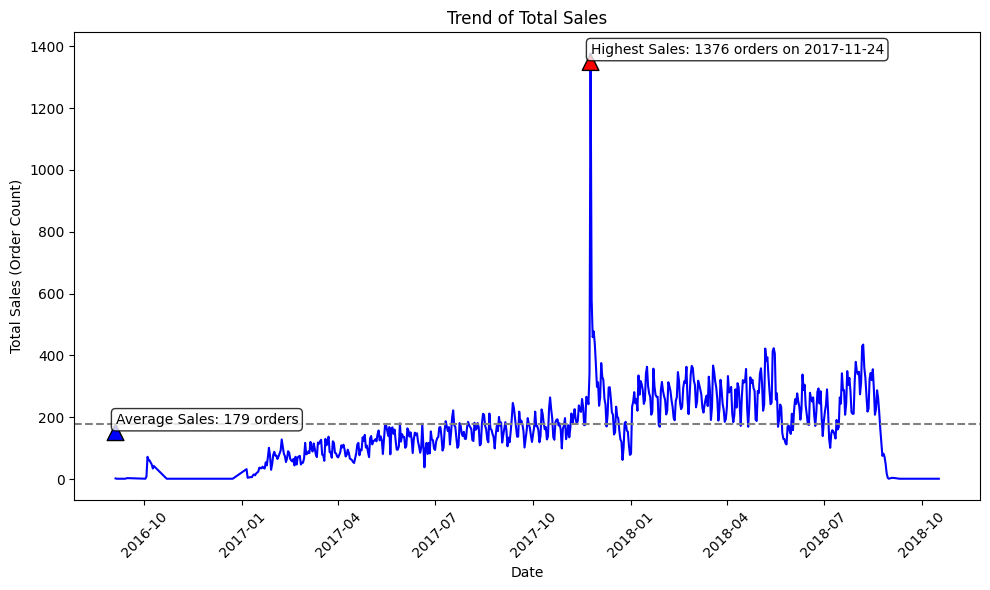

In [ ]:
# Plotting the trend
plt.figure(figsize=(10, 6))
plt.plot(daily_orders.index, daily_orders.values, linestyle='-', color='b')
plt.title('Trend of Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales (Order Count)')
plt.xticks(rotation=45)

plt.axhline(y=rata_rata_daily_orders, color='gray', linestyle='--', label='Average Sales')  # Garis horizontal untuk rata-rata

# Menambahkan label untuk total penjualan tertinggi
plt.annotate(f'Highest Sales: {total_penjualan_tertinggi} orders on {tanggal_penjualan_tertinggi}',
             xy=(tanggal_penjualan_tertinggi, total_penjualan_tertinggi),
             xytext=(tanggal_penjualan_tertinggi, total_penjualan_tertinggi),  # Koordinat teks
             arrowprops=dict(facecolor='red', shrink=0.05),
             horizontalalignment='left',  # Menambahkan panah
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)  # Menambahkan kotak untuk anotasi
             )

# Menambahkan label untuk nilai terendah
#plt.annotate(f'Lowest Sales: {total_penjualan_terendah} orders on {tanggal_penjualan_terendah}',
             #xy=(tanggal_penjualan_terendah, total_penjualan_terendah),
             #xytext=(tanggal_penjualan_terendah, total_penjualan_terendah - 50),  # Koordinat teks
             #arrowprops=dict(facecolor='green', shrink=0.05),
             #horizontalalignment='left',  # Menambahkan panah
             #bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)  # Menambahkan kotak untuk anotasi
             #)


# Menambahkan label untuk nilai rata-rata
plt.annotate(f'Average Sales: {rata_rata_daily_orders:.0f} orders',
             xy=(daily_orders.index[0], rata_rata_daily_orders),
             xytext=(daily_orders.index[0], rata_rata_daily_orders),  # Koordinat teks
             arrowprops=dict(facecolor='blue', shrink=0.05),
             horizontalalignment='left',  # Menambahkan panah
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)  # Menambahkan kotak untuk anotasi
             )

plt.tight_layout()
plt.show()

In [ ]:
daily_orders

order_purchase_timestamp
2016-09-04    2
2016-09-05    1
2016-09-13    1
2016-09-15    3
2016-10-02    1
             ..
2018-09-29    1
2018-10-01    1
2018-10-03    1
2018-10-16    1
2018-10-17    1
Name: order_id, Length: 634, dtype: int64

In [ ]:
from datetime import datetime

# Ubah string tanggal menjadi objek datetime.date
target_date1 = datetime.strptime('2017-11-23', '%Y-%m-%d').date()
target_date2 = datetime.strptime('2017-11-24', '%Y-%m-%d').date()

In [ ]:
# Mengambil jumlah pesanan pada tanggal 23 November 2017
orders_on_nov_23 = daily_orders.loc[target_date1]

# Mengambil jumlah pesanan pada tanggal 24 November 2017
orders_on_nov_24 = daily_orders.loc[target_date2]

# Menghitung persentase kenaikan
percentage_increase = ((orders_on_nov_24 - orders_on_nov_23) / orders_on_nov_23) * 100

print(f"Persentase kenaikan penjualan dari tanggal 23 Nov 2017 ke 24 Nov 2017: {percentage_increase:.2f}%")


Persentase kenaikan penjualan dari tanggal 23 Nov 2017 ke 24 Nov 2017: 302.34%


#### **INSIGHT**
*Insight* yang dapat diambil dari grafik total penjualan sepanjang tahun 2016-2018, yaitu:
* Berdasarkan data penjualan di sebuah platform E-Commerce, terlihat bahwa dari tahun **2016 hingga 2018**, terjadi **peningkatan tren penjualan**. Pada **24 November 2017**, terjadi **lonjakan penjualan** yang sangat signifikan, mencapai peningkatan sebesar **302,34%** dibandingkan dengan penjualan pada 23 November 2017. **Penurunan tajam** juga tercatat mulai dari tanggal **21 Agustus 2018 hingga 17 Oktober 2018**. **Analisis lebih lanjut diperlukan** untuk memahami faktor-faktor yang mempengaruhi penurunan tersebut dan beberapa kemungkinan penyebab (faktor eksternal atau internal) seperti perubahan kebijakan, ketidakstabilan ekonomi, atau masalah operasional internal dalam platform E-Commerce.
* **Peningkatan drastis** pada tanggal **24 November 2017** disebabkan oleh **perayaan Black Friday** yang berasal dari Amerika Serikat yang sudah populer di beberapa negara Amerika Latin termasuk Brazil. Black Friday adalah hari perayaan belanja besar-besaran yang jatuh setiap hari Jumat minggu ke-4 pada bulan November. Karena 24 November 2017 jatuh pada hari Jumat, terjadi lonjakan penjualan yang luar biasa.
* Menariknya, pada **kuartal satu dan dua pada tahun 2017**, tercatat bahwa **penjualan harian lebih rendah** dibandingkan dengan **rata-rata** penjualan dari tahun 2016 hingga 2018. Hal ini dapat dimaklumi **karena nilai rata-rata harian** yang sebesar 179 order per hari **dipengaruhi oleh** adanya **penjualan ekstrem** pada tanggal **24 November 2017**. Sebagai hasil dari lonjakan penjualan yang signifikan ini, nilai rata-rata harian selama kuartal tersebut terpantau lebih rendah.


#### **RECOMMENDATION**
<br>
Rekomendasi yang bisa diberikan, yaitu:
<br>
1. Pelonjakan penjualan <br>

* Memanfaatkan momentum perayaan Black Friday dan
peristiwa penjualan besar-besaran lainnya dengan merancang kampanye pemasaran yang menarik seperti perayaan agama.
* Mempersiapkan strategi promosi yang cermat untuk menjaga minat pelanggan setelah periode penjualan besar-besaran agar penjualan tetap stabil dan tidak drop.
* Menyusun kalender promosi yang lebih merata sepanjang tahun untuk menghindari ketergantungan pada satu peristiwa penjualan besar-besaran seperti promosi ditanggal dan bulan kembar, promosi dihari ulang tahun perusahaan.
* Memperkenalkan promosi atau diskon pada tanggal-tanggal khusus yang mungkin kurang terduga tetapi dapat menarik minat pelanggan seperti hari perempuan sedunia, hari fashion sedunia, dll.

<br>
2. Penurunan penjualan<br>

* Identifikasi apakah ada perubahan kebijakan, ketidakstabilan ekonomi, atau masalah operasional internal yang dapat menjadi penyebab penurunan penjualan.
* Perlu dilakukan evaluasi kondisi ekonomi karena penurunan ekonomi dapat mengurangi daya beli, sehingga strategi pemasaran dan harga perlu disesuaikan.
* Terus memantau tren pasar dan perilaku konsumen untuk mengidentifikasi perubahan dalam preferensi atau kebutuhan pelanggan.

### 2. **Total price per customer_state menggunakan bar chart**

In [ ]:
total_price_per_state = df.groupby('customer_state')['price'].sum().reset_index()
total_price_per_state

,customer_state,price
0,AC,15982.95
1,AL,80314.81
2,AM,22356.84
3,AP,13474.30
4,BA,511349.99
5,CE,227254.71
6,DF,302603.94
7,ES,275037.31
8,GO,294591.95
9,MA,119648.22


In [ ]:
# Mengurutkan DataFrame berdasarkan kolom total harga secara menurun
total_price_per_state_sorted = total_price_per_state.sort_values(by='price', ascending=False)

# Menampilkan total harga tertinggi
highest_total_price_state = total_price_per_state_sorted.iloc[0]

print(f"Negara dengan Total Harga Tertinggi: {highest_total_price_state['customer_state']}")
print(f"Total Harga: R${highest_total_price_state['price']}")

Negara dengan Total Harga Tertinggi: SP
Total Harga: R$5202955.05


In [ ]:
# Mendapatkan tiga total penjualan terendah
lowest_total_price_states = total_price_per_state_sorted.tail(3)

# Menampilkan informasi untuk tiga total penjualan terendah
print("Tiga Total Penjualan Terendah:")
for index, row in lowest_total_price_states.iterrows():
    print(f"Negara: {row['customer_state']}, Total Harga: R${row['price']}")

Tiga Total Penjualan Terendah:
Negara: AC, Total Harga: R$15982.95
Negara: AP, Total Harga: R$13474.3
Negara: RR, Total Harga: R$7829.43


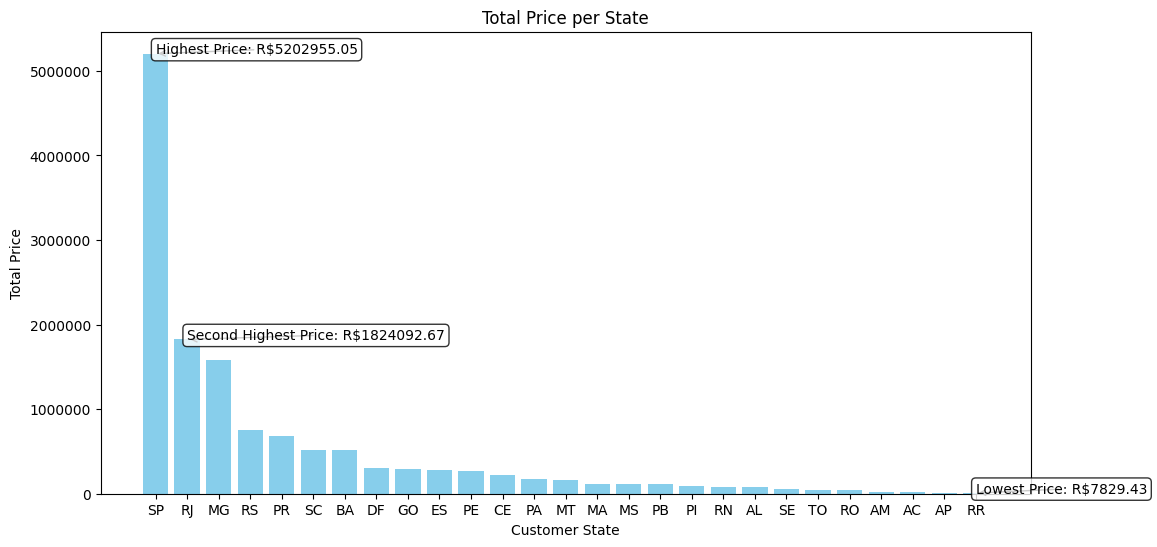

In [ ]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(total_price_per_state_sorted['customer_state'], total_price_per_state_sorted['price'], color='skyblue')
plt.title('Total Price per State')
plt.xlabel('Customer State')
plt.ylabel('Total Price')

# Menemukan indeks untuk data tertinggi kedua
index_second_highest = total_price_per_state_sorted.index[1]

# Menambahkan label untuk total penjualan tertinggi pertama
plt.annotate(f'Highest Price: R${highest_total_price_state["price"]}',
             xy=(highest_total_price_state["customer_state"], highest_total_price_state["price"]),
             xytext=(highest_total_price_state["customer_state"], highest_total_price_state["price"] + 500),  # Koordinat teks
             arrowprops=dict(facecolor='red', arrowstyle='->'),  # Menambahkan panah
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)  # Menambahkan bounding box
             )

# Menambahkan label untuk total penjualan tertinggi kedua dengan penyesuaian posisi
plt.annotate(f'Second Highest Price: R${total_price_per_state_sorted.loc[index_second_highest, "price"]}',
             xy=(total_price_per_state_sorted.loc[index_second_highest, "customer_state"],
                 total_price_per_state_sorted.loc[index_second_highest, "price"]),
             xytext=(total_price_per_state_sorted.loc[index_second_highest, "customer_state"],
                     total_price_per_state_sorted.loc[index_second_highest, "price"] + 500),  # Koordinat teks
             arrowprops=dict(facecolor='blue', arrowstyle='->'),  # Menambahkan panah
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)  # Menambahkan bounding box
             )

# Menambahkan label untuk total penjualan terendah
lowest_total_price_state2 = total_price_per_state_sorted.iloc[-1]

plt.annotate(f'Lowest Price: R${lowest_total_price_state2["price"]}',
             xy=(lowest_total_price_state2["customer_state"], lowest_total_price_state2["price"]),
             xytext=(lowest_total_price_state2["customer_state"], lowest_total_price_state2["price"] - 500),  # Koordinat teks
             arrowprops=dict(facecolor='green', arrowstyle='->'),  # Menambahkan panah
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.8)  # Menambahkan bounding box
             )

# Menghilangkan notasi ilmiah di sumbu y
plt.ticklabel_format(style='plain', axis='y')

plt.show()


#### **INSIGHT**
*Insight* yang dapat diambil dari grafik harga total di tiap negara bagian sepanjang tahun 2016-2018, yaitu: <br>
* Berdasarkan grafik, **Sao Paulo** mendominasi total penjualan yang mencapai **5.2M** atau 5,2 juta Real Brazil selama 2016-2018. Total penjualan tertinggi ini **memiliki perbedaan** yang signifikan **dengan** total penjualan kedua tertinggi yang berada di wiayah **Rio De Janeiro, Ibu Kota Brazil**. Perbedaan tersebut memiliki rentang sekitar 3.4M atau 3.4 juta Real Brazil. Hal tersebut terjadi karena meskipun wilayah Sao Paulo bukan Ibu Kota Brazil, namun **Sao Paulo merupakan pusat ekonomi dan keuangan terbesar** di Brazil. Sehingga **Sao Paulo memainkan peran penting dalam perekonomian dan bisnis** dan ini mempengaruhi tingginya aktivitas transaksi penjualan di kota tersebut.
<br>
* Sementara itu, **3 negara bagian** dengan total penjualan **terendah** terjadi di negara bagian **AC (Acre), AP (Amapa), dan RR (Roraima)**, yakni 15.98K real brazil, 13.47K real brazil, dan 7.83K real brazil. Hal tersebut disebabkan **karena** ketiga negara bagian tersebut memiliki **karakteristik geografis yang lebih terpencil** dibandingkan dengan beberapa negara bagian lain. Sehingga dapat mempengaruhi aksesibilitas, **distribusi barang dan konektivitas infrastruktur yang dapat memperlambat pertumbuhan ekonomi**.

#### **RECOMMENDATION**
Rekomendasi yang dapat diberikan, yakni:<br>
1. Memperkuat kehadiran reseller di Sao Paulo dengan meningkatkan strategi pemasaran, promosi, dan dukungan pelanggan di wilayah tersebut.
2. Meskipun total penjualan di Rio De Janeiro cukup tinggi, perusahaan dapat mengevaluasi dan menyesuaikan strategi pemasaran untuk memaksimalkan potensi penjualan di ibu kota Brazil ini.
3. Meskipun penjualan di negara bagian Acre, Amapa, dan Roraima rendah, perusahaan dapat mempertimbangkan eksplorasi lebih lanjut untuk memahami pasar lokal dan menawarkan solusi yang sesuai dengan kebutuhan dan karakteristik setempat.
4. Menjalin kolaborasi dengan pihak eksternal, seperti pemerintah setempat atau mitra bisnis, untuk meningkatkan kondisi ekonomi dan infrastruktur di wilayah terpencil seperti Acre, Amapa, dan Roraima. Mitra bisnis bisa berupa koperasi lokal, organisasi nirlaba lokal yang fokus pada pembangunan ekonomi dan sosial di wilayah terpencil.

### 3. **Tampilkan total penjualan (order_id) berdasarkan order status menggunakan pie chart.**

In [ ]:
df_2018 = df[df['order_purchase_timestamp'].dt.year == 2018]

In [ ]:
total_sales_per_status = df_2018.groupby('order_status')['order_id'].count().reset_index()
total_sales_per_status

,order_status,order_id
0,canceled,370
1,created,1
2,delivered,60324
3,invoiced,133
4,processing,70
5,shipped,609
6,unavailable,145


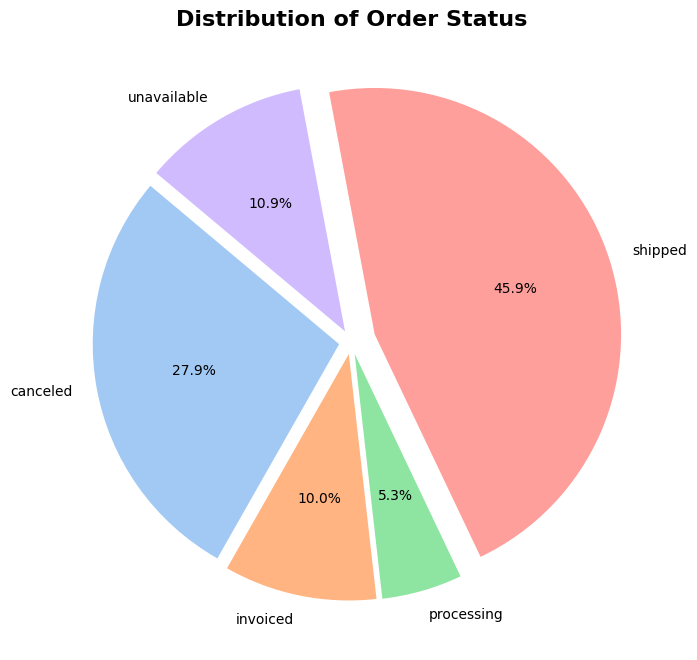

In [ ]:
# Saring data untuk menghilangkan kategori "created" dan "delivered"
filtered_data = total_sales_per_status[~total_sales_per_status['order_status'].isin(['created', 'delivered'])]

import matplotlib.pyplot as plt
import seaborn as sns

# Pilih palet warna
colors = sns.color_palette('pastel')[0:len(filtered_data)]

# Plotting pie chart with aesthetic enhancements
plt.figure(figsize=(8, 8))

# Data
labels = filtered_data['order_status']
sizes = filtered_data['order_id']

# Menentukan nilai explode untuk memberikan penekanan pada slice pertama
explode = (0.05, 0.05, 0.05, 0.1, 0.05)

# Pastikan panjang explode sesuai dengan jumlah kategori
assert len(explode) == len(labels), "Panjang explode harus sama dengan jumlah kategori"

# Plot pie chart with chosen color palette and explode
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

plt.title('Distribution of Order Status', fontsize=16, fontweight='bold')
plt.show()

#### **INSIGHT**<br>
*Insight* yang dapat diambil dari grafik distribusi status order tahun 2016-2018, yaitu: <br>
* Berdasarkan grafik, jumlah pengiriman sukses memiliki persentase hampir 50%, yakni 45.9%. Hal ini tentu menjadi sebuah perhatian karena ada sejumlah besar pengiriman yang tidak berhasil atau mengalami masalah.
<br>
* Terdapat 27.9% dari total order mengalami pembatalan pesanan. Hal ini tentu menjadi sebuah masalah. Umumnya, pembatalan pesanan ini dapat disebabkan oleh beberapa faktor seperti ketidaktersediaan stok, ketidakpastian pengiriman atau keterlambatan dalam proses pengiriman, dan ketidakpuasan pelanggan. Perlu dilakukan analisis lebih dalam lagi dengan data-data terkait seperti data rating/review dan stok barang.
<br>
* Sementara itu, 10.9% merupakan unavailable order dan 10% invoiced order. Terkait unavailable order, hal tersebut perlu dianalisis lebih dalam lagi mengenai alasan ketidaksediaan barang. Apakah pihak logistik selalu mengupdate jumlah stok atau tidak dan apakah pesanan membludka tersebut merupakan produk yang dipasok dari pemasok eksternal sehingga ketika pesanan membludak dan pemasok eksternal tidak memiliki stok yang cukup maka pesanan tidak dapat dipenuhi.

#### **RECOMMENDATION**
Rekomendasi yang bisa diberikan, yaitu:
<br>
1. Optimalkan manajemen stok untuk menghindari ketidaktersediaan barang dan mengurangi risiko pembatalan pesanan.
2. Jika unavailable order banyak disebabkan oleh stok dari pemasok eksternal, kolaborasi yang lebih erat dengan pemasok dan peningkatan pemantauan stok dari pemasok dapat membantu mengatasi masalah ini.
3. Implementasi sistem rating dan review supaya dapat membantu perusahaan melakukan perbaikan yang sesuai.

### 4. **Trend penjualan (order_id) per bulan di tahun 2018 di tiap order status menggunakan stack bar chart**

<Figure size 1200x800 with 0 Axes>

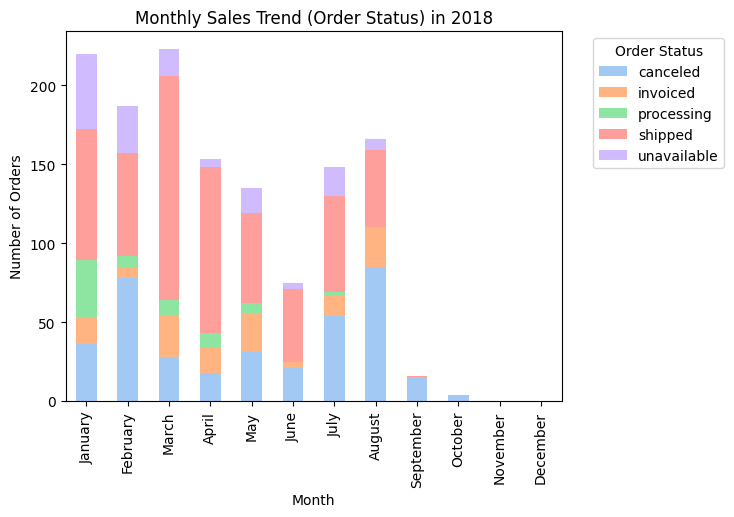

In [ ]:
df_2018 = df[df['order_purchase_timestamp'].dt.year == 2018]

# Filter data untuk tahun 2018 dan order_status tertentu
df_2018_filtered = df_2018[~df_2018['order_status'].isin(['created', 'delivered'])]

# Buat kolom baru untuk bulan
df_2018_filtered['order_month'] = df_2018_filtered['order_purchase_timestamp'].dt.month_name()

# Hitung jumlah order_id untuk setiap kombinasi order_month dan order_status
monthly_status_counts = df_2018_filtered.groupby(['order_month', 'order_status'])['order_id'].count().reset_index()

# Pivot data untuk digunakan dalam stack bar chart
monthly_status_pivot = monthly_status_counts.pivot(index='order_month', columns='order_status', values='order_id')

# Urutkan bulan secara kronologis
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_status_pivot = monthly_status_pivot.reindex(months_order)

# Plot stack bar chart
plt.figure(figsize=(12, 8))
sns.set_palette("pastel")
monthly_status_pivot.plot(kind='bar', stacked=True)
plt.title('Monthly Sales Trend (Order Status) in 2018')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.legend(title='Order Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### **INSIGHT**
*Insight* yang dapat diambil dari grafik tren penjualan bulanan berdasarkan 'order_status' pada tahun 2018, yaitu: <br>

* Grafik trend penjualan bulanan menunjukkan bahwa
bulan **Agustus** tahun 2018 menjadi **perhatian khusus** dalam kaitannya dengan status pesanan. Pertama, terdapat kecenderungan bahwa jumlah pesanan yang berhasil dikirim (**Shipped**) pada bulan Agustus menunjukkan angka yang **paling rendah sepanjang tahun**. Kemudian, yang menjadi sorotan lainnya adalah jumlah pesanan yang dibatalkan (**Canceled**) yang mencapai puncak **tertinggi** pada bulan yang sama.

* **Peningkatan signifikan** terlihat pada bulan **Maret**, di mana proses penagihan (**Invoiced**) mencapai tingkat **tertinggi**. Hal ini menunjukkan bahwa bulan tersebut mungkin menjadi periode dengan **aktivitas transaksi yang lebih intensif**, dan oleh karena itu, **penting untuk memastikan ketersediaan sumber daya dan efisiensi operasional** agar dapat mengelola penagihan dengan baik.

* Sementara itu, pada awal tahun, khususnya di bulan **Januari**, terjadi **peningkatan yang mencolok** pada pesanan yang sedang dalam proses (**Order in Process**) dan pesanan yang tidak dapat dipenuhi (**Unavailable**). Ini **menimbulkan pertanyaan** mengenai **kapasitas dan manajemen persediaan pada awal tahun**, serta **perlunya peninjauan terhadap strategi ketersediaan produk**.

#### **RECOMMENDATION**
Rekomendasi yang dapat diberikan, yaitu:<br>
* Upaya untuk meningkatkan efisiensi dalam proses pengiriman pada bulan Agustus
* Mengevaluasi penyebab dibalik pembatalan pesanan yang tinggi
* Mengoptimalkan proses penagihan untuk menangani lonjakan pada bulan Maret
* Memperkuat kapasitas dan manajemen persediaan pada awal tahun guna mengatasi peningkatan pesanan dalam proses dan pesanan yang tidak tersedia